In [ ]:
pip install anytree


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 1.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from anytree import Node as AnyNode, RenderTree
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/movie2019.csv')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,Midsommar,R,Drama,2019-01-01,"July 3, 2019 (United States)",7.1,232000.0,Ari Aster,Ari Aster,Florence Pugh,United States,9000000.0,4.796764e+07,A24,148.0
1,Once Upon a Time... In Hollywood,R,Comedy,2019-01-01,"July 26, 2019 (United States)",7.6,603000.0,Quentin Tarantino,Quentin Tarantino,Leonardo DiCaprio,United States,90000000.0,3.745658e+08,Columbia Pictures,161.0
2,Avengers: Endgame,PG-13,Action,2019-01-01,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3,Fighting with My Family,PG-13,Biography,2019-01-01,"February 22, 2019 (United States)",7.1,71000.0,Stephen Merchant,Stephen Merchant,Dwayne Johnson,United Kingdom,11000000.0,4.081192e+07,Metro-Goldwyn-Mayer (MGM),108.0
4,Little Women,PG,Drama,2019-01-01,"December 25, 2019 (United States)",7.8,159000.0,Greta Gerwig,Greta Gerwig,Saoirse Ronan,United States,40000000.0,2.166012e+08,Columbia Pictures,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Chasing the Dragon II: Wild Wild Bunch,Not Rated,Action,2019-01-01,"June 7, 2019 (United States)",5.8,523.0,Jason Kwan,Koon-Nam Lui,Tony Ka Fai Leung,China,NaN,4.573846e+07,Bona Film Group,101.0
196,Round of Your Life,NaN,Family,2019-01-01,"June 21, 2019 (United States)",4.6,150.0,Dylan Thomas Ellis,Tim Ogletree,Cole Allen,United States,NaN,2.094100e+04,Aristar Entertainment,91.0
197,El Coyote,R,Action,2019-01-01,"October 4, 2019 (United States)",3.0,122.0,Jeffrey Nicholson,Jeffrey Nicholson,Michael Saquella,United States,NaN,1.101470e+06,Cactus Blue Entertainment,93.0
198,By Light of Desert Night,NaN,Drama,2019-01-01,"March 3, 2020 (United States)",4.8,373.0,David Stuart Snell,David Stuart Snell,Alexandra Bokova,United States,NaN,NaN,Canyon Media,94.0


In [ ]:
class Node:
    def __init__(self, rating, title):
        self.rating = rating
        self.titles = [title]
        self.left = None
        self.right = None

    def add_title(self, title):
        self.titles.append(title)

class MovieBST:
    def __init__(self):
        self.root = None

    def insert(self, rating, title):
        if not self.root:
            self.root = Node(rating, title)
        else:
            self._insert_recursive(self.root, rating, title)

    def _insert_recursive(self, current_node, rating, title):
        if rating == current_node.rating:
            current_node.add_title(title)
        elif rating < current_node.rating:
            if current_node.left is None:
                current_node.left = Node(rating, title)
            else:
                self._insert_recursive(current_node.left, rating, title)
        elif rating > current_node.rating:
            if current_node.right is None:
                current_node.right = Node(rating, title)
            else:
                self._insert_recursive(current_node.right, rating, title)

    def preorder_traversal(self):
        result = []
        self._preorder_recursive(self.root, result)
        return result

    def _preorder_recursive(self, current_node, result):
        if current_node:
            for title in current_node.titles:
                result.append((current_node.rating, title))
            self._preorder_recursive(current_node.left, result)
            self._preorder_recursive(current_node.right, result)

    def inorder_traversal(self):
        result = []
        self._inorder_traversal_recursive(self.root, result)
        return result

    def _inorder_traversal_recursive(self, current_node, result):
        if current_node:
            self._inorder_traversal_recursive(current_node.left, result)
            for title in current_node.titles:
                result.append((current_node.rating, title))
            self._inorder_traversal_recursive(current_node.right, result)

    def postorder_traversal(self):
        result = []
        self._postorder_recursive(self.root, result)
        return result

    def _postorder_recursive(self, current_node, result):
        if current_node:
            self._postorder_recursive(current_node.left, result)
            self._postorder_recursive(current_node.right, result)
            for title in current_node.titles:
                result.append((current_node.rating, title))

    def search(self, rating):
        return self._search_recursive(self.root, rating)

    def search_all_by_rating(self, rating):
        return self._search_all_by_rating_recursive(self.root, rating)

    def _search_all_by_rating_recursive(self, current_node, rating):
        if current_node is None:
            return []

        if rating == current_node.rating:
            return current_node.titles

        elif rating < current_node.rating:
            return self._search_all_by_rating_recursive(current_node.left, rating)
        else:
            return self._search_all_by_rating_recursive(current_node.right, rating)

file_movie = '/content/movie2019.csv'
movie_bst = MovieBST()

data = pd.read_csv(file_movie)
for index, row in data.iterrows():
    rating = row['score']
    title = row['name']
    movie_bst.insert(rating, title)

rating_to_search = 6.3
result = movie_bst.search_all_by_rating(rating_to_search)

if result:
    print(f"Film dengan rating {rating_to_search} adalah:")
    for title in result:
        print(f"- {title}")
else:
    print(f"Tidak ada film dengan rating {rating_to_search}.")


Film dengan rating 6.3 adalah:
- Hustlers
- The Goldfinch
- Sword of Trust
- Dumbo
- The Aftermath
- After the Wedding
- Breakthrough
- Cliffs of Freedom
- Luka Chuppi
- Furie
- Piranhas


In [ ]:
# penggunaan traversal (preorder)
preorder_result = movie_bst.preorder_traversal()
print("Hasil Pre-order Traversal:")
for rating, title in preorder_result:
    print(f"Rating: {rating}, Judul: {title}")

Hasil Pre-order Traversal:
Rating: 7.1, Judul: Midsommar
Rating: 7.1, Judul: Fighting with My Family
Rating: 7.1, Judul: Extreme Job
Rating: 6.4, Judul: Escape Room
Rating: 6.4, Judul: Fast & Furious Presents: Hobbs & Shaw
Rating: 6.4, Judul: Angel Has Fallen
Rating: 6.4, Judul: The Angry Birds Movie 2
Rating: 6.4, Judul: The Souvenir
Rating: 6.4, Judul: Ode to Joy
Rating: 6.4, Judul: Shaft
Rating: 6.4, Judul: Don't Let Go
Rating: 6.4, Judul: Mine 9
Rating: 6.4, Judul: The Least of These: The Graham Staines Story
Rating: 5.5, Judul: The Dead Don't Die
Rating: 5.5, Judul: The Beach Bum
Rating: 5.5, Judul: The Kitchen
Rating: 5.5, Judul: Little
Rating: 5.5, Judul: Ek Ladki Ko Dekha Toh Aisa Laga
Rating: 5.3, Judul: After
Rating: 5.3, Judul: The Curse of la Llorona
Rating: 5.3, Judul: What Men Want
Rating: 5.3, Judul: Can You Keep a Secret?
Rating: 5.3, Judul: Crypto
Rating: 5.2, Judul: Hellboy
Rating: 5.2, Judul: Run with the Hunted
Rating: 5.2, Judul: Saaho
Rating: 5.0, Judul: 47 Meters

In [ ]:
# penggunaan traversal (inorder)
inorder_result = movie_bst.inorder_traversal()
print("Hasil Inorder Traversal:")
for rating, title in inorder_result:
    print(f"Rating: {rating}, Judul: {title}")

Hasil Inorder Traversal:
Rating: 2.2, Judul: Student of the Year 2
Rating: 3.0, Judul: El Coyote
Rating: 3.5, Judul: High on the Hog
Rating: 3.6, Judul: Kalank
Rating: 4.1, Judul: The Fanatic
Rating: 4.2, Judul: Total Dhamaal
Rating: 4.2, Judul: No Manches Frida 2
Rating: 4.5, Judul: A Madea Family Funeral
Rating: 4.5, Judul: India's Most Wanted
Rating: 4.6, Judul: Round of Your Life
Rating: 4.7, Judul: Shed of the Dead
Rating: 4.8, Judul: Body at Brighton Rock
Rating: 4.8, Judul: By Light of Desert Night
Rating: 4.9, Judul: Bharat
Rating: 4.9, Judul: Tod@s Caen
Rating: 5.0, Judul: 47 Meters Down: Uncaged
Rating: 5.0, Judul: UglyDolls
Rating: 5.1, Judul: Before You Know It
Rating: 5.2, Judul: Hellboy
Rating: 5.2, Judul: Run with the Hunted
Rating: 5.2, Judul: Saaho
Rating: 5.3, Judul: After
Rating: 5.3, Judul: The Curse of la Llorona
Rating: 5.3, Judul: What Men Want
Rating: 5.3, Judul: Can You Keep a Secret?
Rating: 5.3, Judul: Crypto
Rating: 5.4, Judul: Serenity
Rating: 5.4, Judul: T

In [ ]:
# penggunaan traversal (postorder)
postorder_result = movie_bst.postorder_traversal()
print("Hasil Postorder Traversal:")
for rating, title in postorder_result:
    print(f"Rating: {rating}, Judul: {title}")

Hasil Postorder Traversal:
Rating: 3.0, Judul: El Coyote
Rating: 3.5, Judul: High on the Hog
Rating: 2.2, Judul: Student of the Year 2
Rating: 3.6, Judul: Kalank
Rating: 4.2, Judul: Total Dhamaal
Rating: 4.2, Judul: No Manches Frida 2
Rating: 4.6, Judul: Round of Your Life
Rating: 4.7, Judul: Shed of the Dead
Rating: 4.9, Judul: Bharat
Rating: 4.9, Judul: Tod@s Caen
Rating: 4.8, Judul: Body at Brighton Rock
Rating: 4.8, Judul: By Light of Desert Night
Rating: 4.5, Judul: A Madea Family Funeral
Rating: 4.5, Judul: India's Most Wanted
Rating: 4.1, Judul: The Fanatic
Rating: 5.1, Judul: Before You Know It
Rating: 5.0, Judul: 47 Meters Down: Uncaged
Rating: 5.0, Judul: UglyDolls
Rating: 5.2, Judul: Hellboy
Rating: 5.2, Judul: Run with the Hunted
Rating: 5.2, Judul: Saaho
Rating: 5.4, Judul: Serenity
Rating: 5.4, Judul: The Hustle
Rating: 5.4, Judul: Killerman
Rating: 5.4, Judul: Them That Follow
Rating: 5.3, Judul: After
Rating: 5.3, Judul: The Curse of la Llorona
Rating: 5.3, Judul: What 

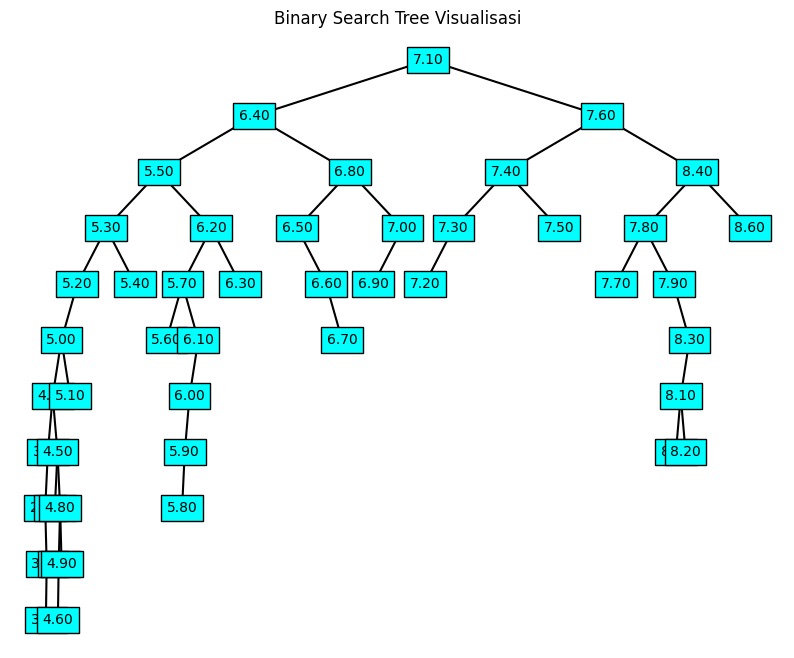

Film dengan rating 7.9 adalah:
- Knives Out
- Jojo Rabbit
- Marriage Story
- 42nd Street: The Musical
- Open


In [ ]:
class Node:
    def __init__(self, rating, title):
        self.rating = rating
        self.titles = [title]
        self.left = None
        self.right = None

    def add_title(self, title):
        self.titles.append(title)

class MovieBST:
    def __init__(self):
        self.root = None

    def insert(self, rating, title):
        if not self.root:
            self.root = Node(rating, title)
        else:
            self._insert_recursive(self.root, rating, title)

    def _insert_recursive(self, current_node, rating, title):
        if rating == current_node.rating:
            current_node.add_title(title)
        elif rating < current_node.rating:
            if current_node.left is None:
                current_node.left = Node(rating, title)
            else:
                self._insert_recursive(current_node.left, rating, title)
        elif rating > current_node.rating:
            if current_node.right is None:
                current_node.right = Node(rating, title)
            else:
                self._insert_recursive(current_node.right, rating, title)

    def preorder_traversal(self):
        result = []
        self._preorder_recursive(self.root, result)
        return result

    def _preorder_recursive(self, current_node, result):
        if current_node:
            for title in current_node.titles:
                result.append((current_node.rating, title))
            self._preorder_recursive(current_node.left, result)
            self._preorder_recursive(current_node.right, result)

    def inorder_traversal(self):
        result = []
        self._inorder_traversal_recursive(self.root, result)
        return result

    def _inorder_traversal_recursive(self, current_node, result):
        if current_node:
            self._inorder_traversal_recursive(current_node.left, result)
            for title in current_node.titles:
                result.append((current_node.rating, title))
            self._inorder_traversal_recursive(current_node.right, result)

    def postorder_traversal(self):
        result = []
        self._postorder_recursive(self.root, result)
        return result

    def _postorder_recursive(self, current_node, result):
        if current_node:
            self._postorder_recursive(current_node.left, result)
            self._postorder_recursive(current_node.right, result)
            for title in current_node.titles:
                result.append((current_node.rating, title))

    def search(self, rating):
        return self._search_recursive(self.root, rating)

    def search_all_by_rating(self, rating):
        return self._search_all_by_rating_recursive(self.root, rating)

    def _search_all_by_rating_recursive(self, current_node, rating):
        if current_node is None:
            return []

        if rating == current_node.rating:
            return current_node.titles

        elif rating < current_node.rating:
            return self._search_all_by_rating_recursive(current_node.left, rating)
        else:
            return self._search_all_by_rating_recursive(current_node.right, rating)

    def visualize_tree(self):
        if self.root:
            plt.figure(figsize=(10, 8))
            self._plot_tree(self.root, x=0, y=0, level=1)
            plt.axis('off')
            plt.title('Binary Search Tree Visualisasi')
            plt.show()
        else:
            print("Pohon kosong.")

    def _plot_tree(self, current_node, x, y, level):
        if current_node:
            spacing = 2  # Jarak antara node yang berbeda kedalaman
            plt.text(x, y, f"{current_node.rating:.2f}", ha='center', va='center', fontsize=10, bbox=dict(facecolor='cyan', alpha=1))

            if current_node.left:
                x_left = x - 20 * level
                y_left = y - 5
                plt.plot([x, x_left], [y, y_left], 'k-')
                self._plot_tree(current_node.left, x_left, y_left, level * 0.55)

            if current_node.right:
                x_right = x + 20 * level
                y_right = y - 5
                plt.plot([x, x_right], [y, y_right], 'k-')
                self._plot_tree(current_node.right, x_right, y_right, level * 0.55)
movie_bst.visualize_tree()

file_movie = '/content/movie2019.csv'
movie_bst = MovieBST()

for index, row in data.iterrows():
    rating = row['score']
    title = row['name']
    movie_bst.insert(rating, title)

rating_to_search = 7.9
result = movie_bst.search_all_by_rating(rating_to_search)

if result:
    print(f"Film dengan rating {rating_to_search} adalah:")
    for title in result:
        print(f"- {title}")
else:
    print(f"Tidak ada film dengan rating {rating_to_search}.")
